In [9]:
from astropy.io import fits
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
tlist=np.logspace(np.log10(5e3),np.log10(1e6),100)
dlist=np.logspace(-15,-7,20)

wantrho=1e-9 
wanttemp=5e4

i=np.argmin(abs(tlist-wanttemp))
j=np.argmin(abs(dlist-wantrho))

num=i*len(dlist)+j

In [58]:
dir_path='/Users/asecunda/Documents/thesis/radsims1/toyanfeiv2 (1)/work/'

hud = fits.open(dir_path+'/ares/opakout'+str(num)+'.fits')
names=hud[1].data['parameter']
print("Temperature",hud[1].data['value'][names=='temperature']*1e4)
print("Density",hud[1].data['value'][names=='density']*1.67e-24)
print("Pressure",hud[1].data['value'][names=='pressure'])

Temperature [49935.25505066]
Density [7.84759993e-10]
Pressure [1.17326918e+19]


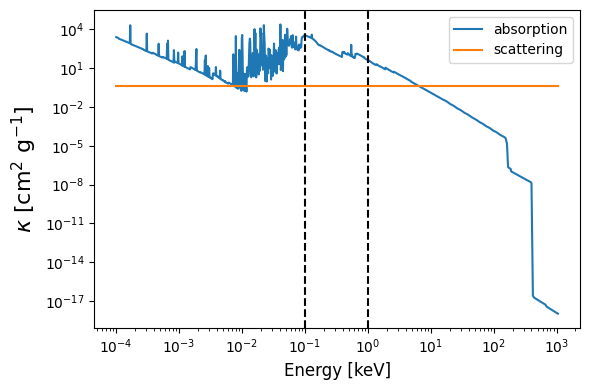

In [59]:
rho=hud[1].data['value'][names=='density']*1.67e-24

fig=plt.figure(figsize=(6,4)) 
plt.plot(hud[3].data['energy']/1000,hud[3].data['opacity ']/rho,label='absorption')
plt.plot(hud[3].data['energy']/1000,hud[3].data['scattering']/rho,label='scattering')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
#plt.xlim(1000,1e6)
plt.axvline(0.1,linestyle='dashed',color='black')
plt.axvline(1,linestyle='dashed',color='black')

plt.xlabel('Energy [keV]',fontsize=12)
plt.ylabel(r'$\kappa$ [cm$^2~$g$^{-1}$]',fontsize=16)
plt.legend()
plt.tight_layout()

#plt.savefig('opex.pdf')